In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt


In [2]:
train_dir = "../data/fer2013/train"
test_dir = "../data/fer2013/test"



In [3]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical"
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),

    Dense(7,activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


C:\Users\deogh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.2897 - loss: 1.7529 - val_accuracy: 0.3980 - val_loss: 1.5970
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.3864 - loss: 1.5747 - val_accuracy: 0.4501 - val_loss: 1.4525
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4239 - loss: 1.4899 - val_accuracy: 0.4607 - val_loss: 1.4056
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4414 - loss: 1.4491 - val_accuracy: 0.4738 - val_loss: 1.3632
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4589 - loss: 1.4095 - val_accuracy: 0.4799 - val_loss: 1.3248
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4719 - loss: 1.3794 - val_accuracy: 0.4781 - val_loss: 1.3415
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.4807 - loss: 1.3459 - val_accuracy: 0.5082 - val_loss: 1.2807
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4933 - loss: 1.3161 - 

In [6]:
model.save("../backend/emotion_model.h5")


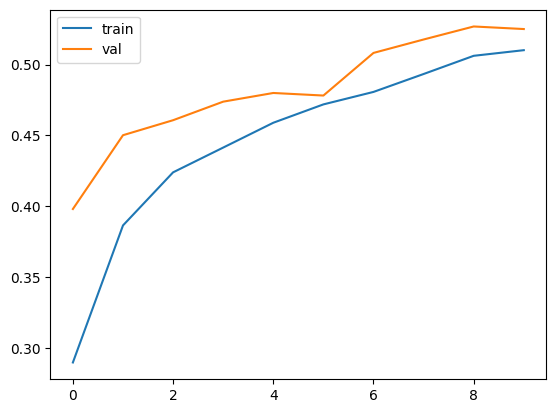

In [7]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()
